----

# <p style='text-align: center;'> Lead Scoring Case Study </p>
----

### <font color = blue> <p style='text-align: center;'> Submitted by </p>
<font color = blue> <p style='text-align: center;'> Anil Thakre </p>
<font color = blue> <p style='text-align: center;'> Atul Mani </p>
<font color = blue> <p style='text-align: center;'> Yamuna </p>
    
----

 ### Problem Statement
 
  <font color = blue> <p>X Education sells online courses to industry professionals 
 <font color = blue> <p> It has Poor lead conversion ratio of around 30%
 <font color = blue> <p> target lead conversion rate is around 80%
        
     

 ### Objective
 
 
 <font color = blue> <p> To build Logistic Regression model to select the leads that are most likely to convert into paying customers
 
 <font color = blue> <p> Model to be flexible in order to adjust to if the company's requirement changes in the future 

In [1]:
# import basic Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

## 1.  Data Import & Interpretation

In [3]:
#Import Data

lead = pd.read_csv("Leads.csv")

lead.head()


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Creating a copy for future usage


lead_original = lead.copy(deep=True)

### Data Interpretation

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## 2.  Data Preparation

### Handling Null Values

In [8]:
# Percentage of Null Values for every column

round( 100 * lead.isnull().sum() / len(lead), 2 )

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Let us replace entries 'Select' with Null

There are several entries with value "Select" which practically means Null value as user did not input the data

In [9]:

lead.replace('Select',np.nan, inplace= True)  
    

In [10]:
# Percentage of Null Values for every column after replacement of "Select"

round( 100 * lead.isnull().sum() / len(lead), 2 )

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Delete the Features with Null values > 40%

for col in lead.columns:
    
    if lead[col].isnull().sum()/len(lead[col]) > 0.4:
        lead.drop(col, axis=1, inplace=True)

lead.shape

(9240, 30)

In [12]:
#Delete the rows with Null values < 5%

for col in lead.columns:
    
    if (lead[col].isnull().sum()/len(lead[col]) < 0.05) & (lead[col].isnull().sum() !=0) :
        lead.dropna(subset=[col],inplace=True)

lead.shape

(9074, 30)

In [13]:
# Percentage of Null Values for every column after replacement of "Select"

round( 100 * lead.isnull().sum() / len(lead), 2 )

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   36.17
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:

# initiating lists for different type of columns 

numeric_cols = []        # columns having numeric values 
no_value_cols = []       # columns having numeric values 
binary_cols = []         # columns having numeric values 
categorical_cols = []    # collecting related column to each type

for col in lead.columns:
    if lead[col].dtype=="O":
        if len(lead[col].unique()) == 1: 
            no_value_cols.append(col)
        elif len(lead[col].unique()) == 2: 
            binary_cols.append(col)
        elif len(lead[col].unique()) > 2: 
            categorical_cols.append(col)
        else: 
            numeric_cols.append(col)

            
# printing the column and its unique values for categorical values

print("="*100,"\n\n")
print("Columns having single categorical value, hence don't have analysis value: \n\n") 
for col in no_value_cols:
    print(col, ": ", lead[col].unique(),"\n") 
    
print("="*100,"\n\n")
print("Columns having Binary Values: \n\n") 

for col in binary_cols:
        print(col, ": ", lead[col].unique(),"\n") 

print("="*100,"\n\n")
print("Columns having more than two categorical Values: \n\n") 

for col in categorical_cols:
    print(col, ": ", lead[col].unique(),"\n") 
print("-"*100)




Columns having single categorical value, hence don't have analysis value: 


Magazine :  ['No'] 

Receive More Updates About Our Courses :  ['No'] 

Update me on Supply Chain Content :  ['No'] 

Get updates on DM Content :  ['No'] 

I agree to pay the amount through cheque :  ['No'] 



Columns having Binary Values: 


Do Not Email :  ['No' 'Yes'] 

Do Not Call :  ['No' 'Yes'] 

Search :  ['No' 'Yes'] 

Newspaper Article :  ['No' 'Yes'] 

X Education Forums :  ['No' 'Yes'] 

Newspaper :  ['No' 'Yes'] 

Digital Advertisement :  ['No' 'Yes'] 

Through Recommendations :  ['No' 'Yes'] 

A free copy of Mastering The Interview :  ['No' 'Yes'] 



Columns having more than two categorical Values: 


Prospect ID :  ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 

Lead Origin :  ['API' 'Landing Page

### Dropping the columns without any analytical value
---

<b>'Prospect ID' & 'Lead Number':
    
    Are unique Identifiers for the data rows hence have no analytical value
    


<b>'Magazine' , 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM <b>Content','I agree to pay the amount through cheque' :
    
    These columns have only one value ('No') hence have no analytical value


In [15]:
toBeDeleted = ['Prospect ID', 'Lead Number','Magazine' , 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']


In [16]:
lead.drop(toBeDeleted,axis=1,inplace=True)

In [17]:
lead.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags    City  \
0          Interested in other courses     NaN   
1                              Ringing     NaN   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### Filling other NULL values with word "Unknown"

For the remainnig columns with Null values let us replace Null values with "Unknown" as a value for our analysis


In [18]:

lead.fillna("Unknown", inplace=True)


In [19]:
# Percentage of Null Values for every column after replacement Null

round( 100 * lead.isnull().sum() / len(lead), 2 )

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [20]:
lead.rename(columns= {'Total Time Spent on Website':'timeOnWebsite', 'Page Views Per Visit': 'viewsPerVisit', 'What is your current occupation': 'occupation','What matters most to you in choosing a course':'mainmotto','Receive More Updates About Our Courses':'courseUpdates','Update me on Supply Chain Content':'supplyChainUpdates','Get updates on DM Content':'dmUpdates', 'I agree to pay the amount through cheque':'chequePay','A free copy of Mastering The Interview':'freeBook','Last Notable Activity':'studentActivity'}, inplace=True)


lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'timeOnWebsite', 'viewsPerVisit',
       'Last Activity', 'Country', 'Specialization', 'occupation', 'mainmotto',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'freeBook', 'studentActivity'],
      dtype='object')

##  Exploratory Data Analysis

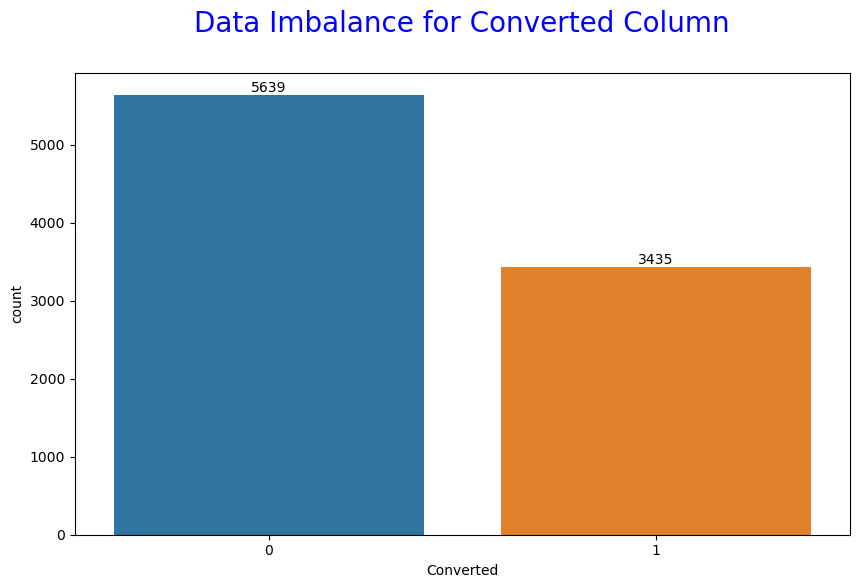

In [21]:
#Let us check for data imbalance for target column

fig, ax = plt.subplots(figsize=[10,6])

bars=sns.countplot(x='Converted', data= lead).set_title('Data Imbalance for Converted Column\n',color='blue',fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

In [22]:
#Not significant imbalance

In [23]:
#EDA for the categorical columns


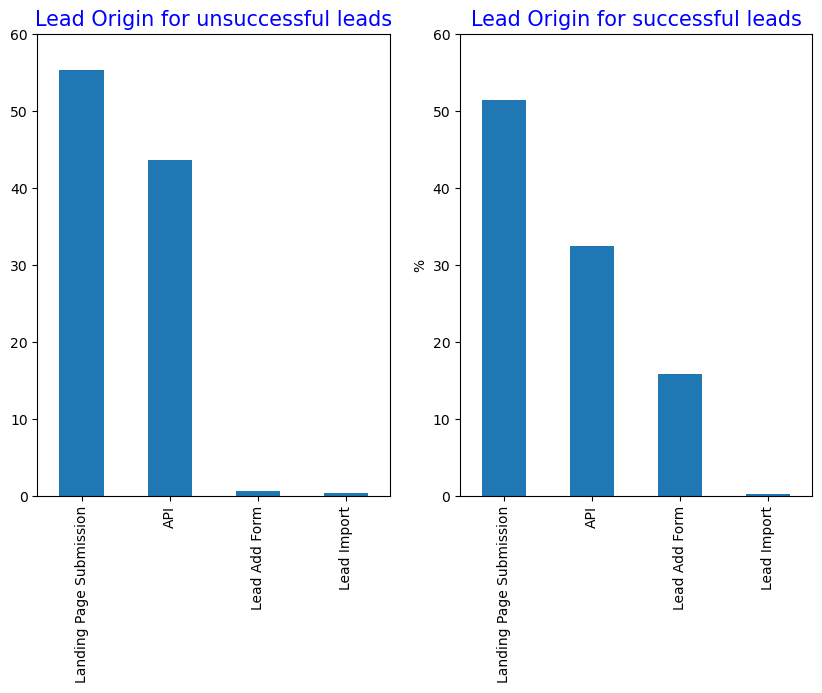

In [24]:
# Calculate the percentages for Lead Origin
unsuccessful_lead_origin = lead['Lead Origin'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_lead_origin = lead['Lead Origin'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_lead_origin.plot.bar()
ax.set_title('Lead Origin for unsuccessful leads', fontsize=15, color='blue')
ax.set_ylim(0, 60)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_lead_origin.plot.bar()
ax.set_title('Lead Origin for successful leads', fontsize=15, color='blue')
ax.set_ylabel("%")
ax.set_ylim(0, 60)  # Set the range of the y-axis

# Display the plot
plt.show()

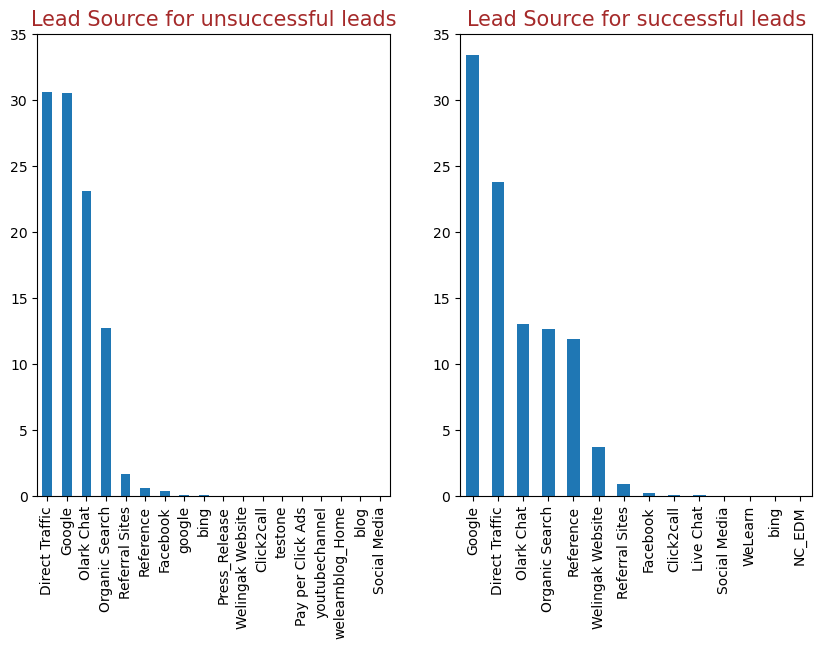

In [25]:
# Calculate the percentages for 'Lead Source'
unsuccessful_lead_source = lead['Lead Source'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_lead_source = lead['Lead Source'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_lead_source.plot.bar()
ax.set_title('Lead Source for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 35)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_lead_source.plot.bar()
ax.set_title('Lead Source for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 35)  # Set the range of the y-axis

# Display the plot
plt.show()

In [26]:
#Country

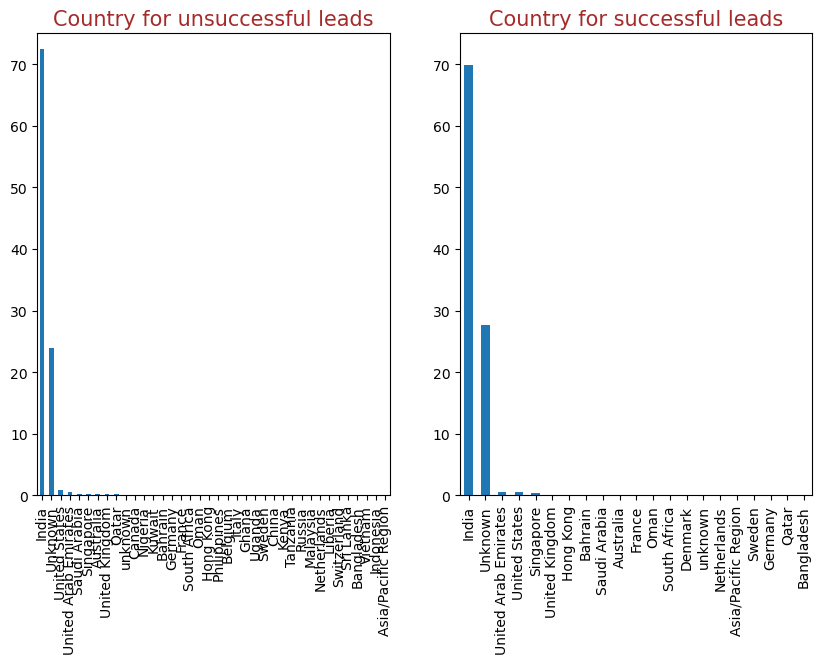

In [27]:
# Calculate the percentages for 'Country'

unsuccessful_Country = lead['Country'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_Country = lead['Country'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_Country.plot.bar()
ax.set_title('Country for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_Country.plot.bar()
ax.set_title('Country for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Display the plot
plt.show()

In [28]:
#Specialization

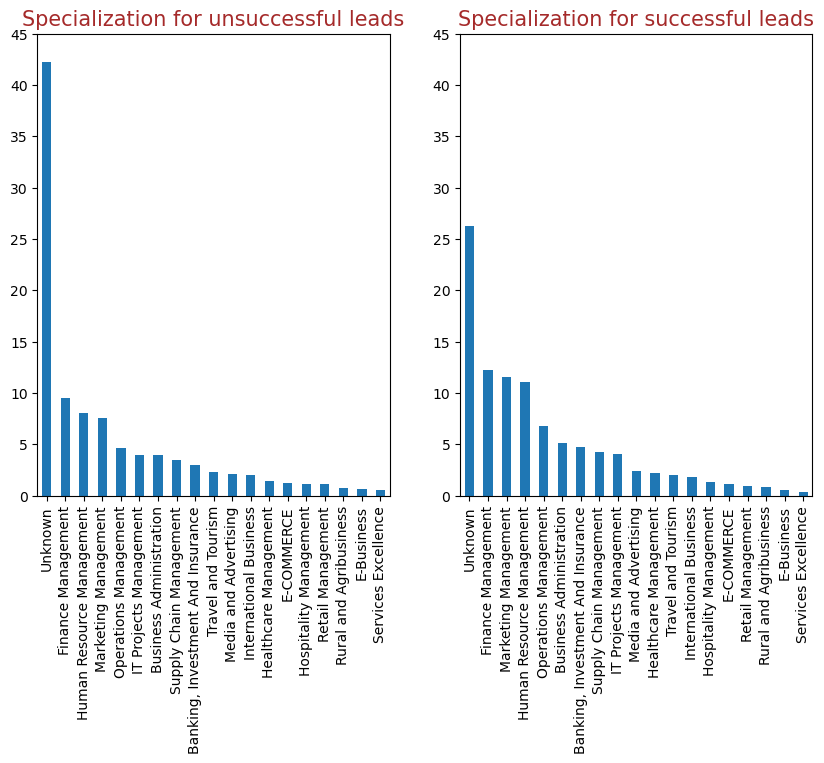

In [29]:
# Calculate the percentages for 'Specialization'

unsuccessful_Specialization = lead['Specialization'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_Specialization = lead['Specialization'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_Specialization.plot.bar()
ax.set_title('Specialization for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 45)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_Specialization.plot.bar()
ax.set_title('Specialization for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 45)  # Set the range of the y-axis

# Display the plot
plt.show()

In [30]:
#occupation

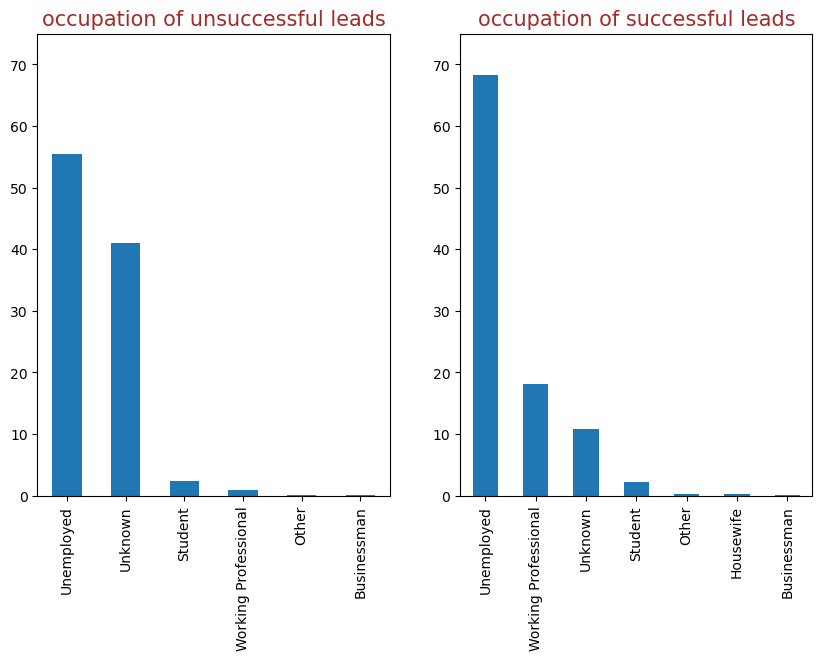

In [31]:
# Calculate the percentages for 'occupation'

unsuccessful_occupation = lead['occupation'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_occupation = lead['occupation'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_occupation.plot.bar()
ax.set_title('occupation of unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_occupation.plot.bar()
ax.set_title('occupation of successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Display the plot
plt.show()

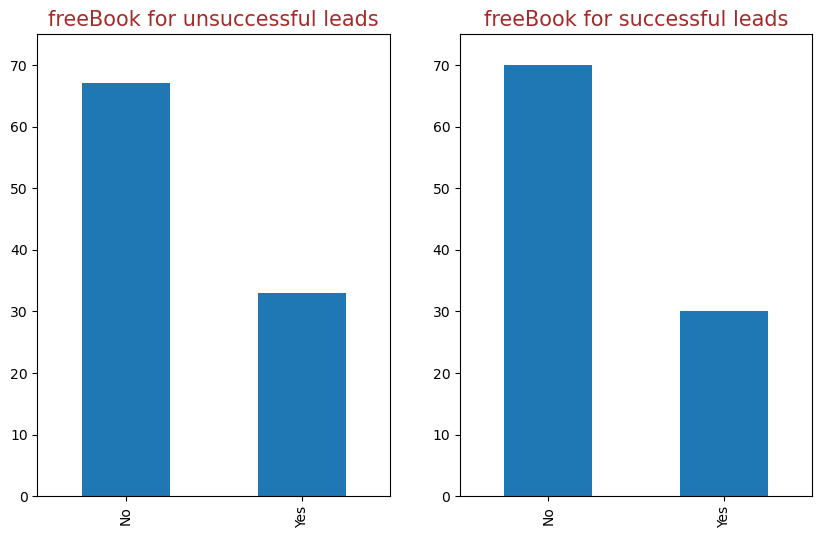

In [32]:
# Calculate the percentages for 'freeBook'

unsuccessful_freeBook = lead['freeBook'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_freeBook = lead['freeBook'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_freeBook.plot.bar()
ax.set_title('freeBook for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_freeBook.plot.bar()
ax.set_title('freeBook for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 75)  # Set the range of the y-axis

# Display the plot
plt.show()

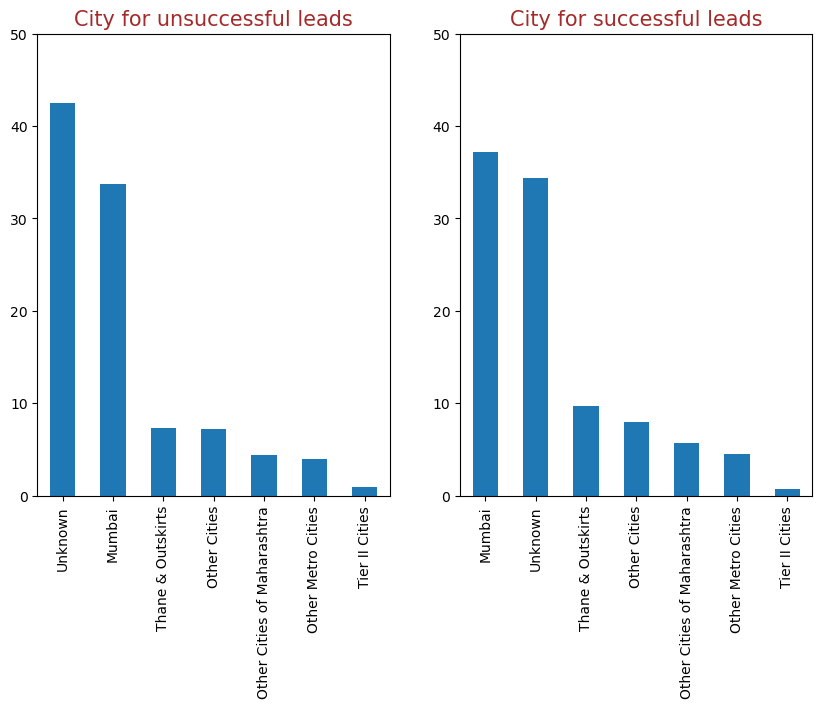

In [33]:
# Calculate the percentages for 'City'

unsuccessful_City = lead['City'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful_City = lead['City'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful_City.plot.bar()
ax.set_title('City for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 50)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful_City.plot.bar()
ax.set_title('City for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 50)  # Set the range of the y-axis

# Display the plot
plt.show()

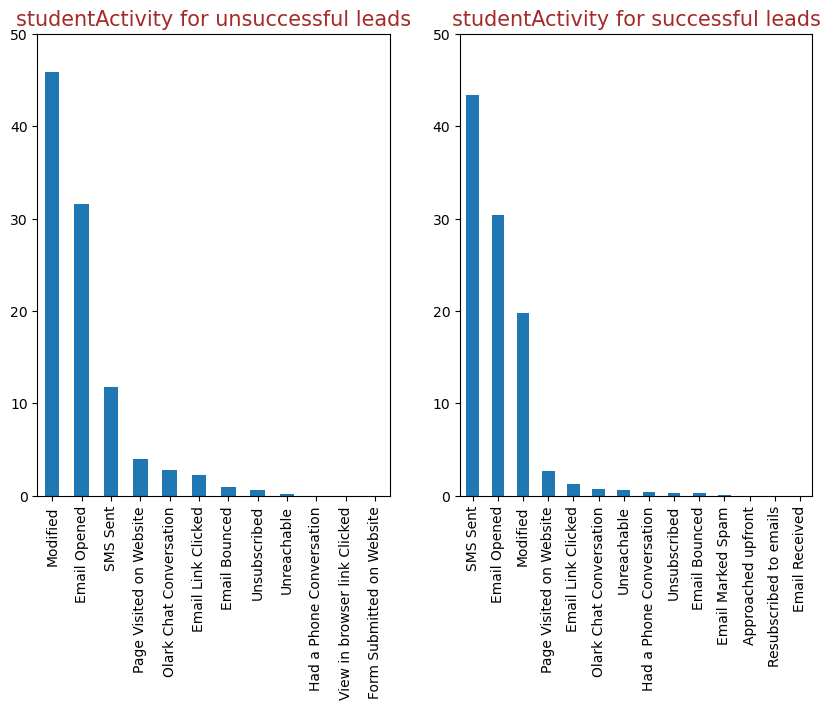

In [34]:
# Calculate the percentages for 'studentActivity'

unsuccessful = lead['studentActivity'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful = lead['studentActivity'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful.plot.bar()
ax.set_title('studentActivity for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 50)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful.plot.bar()
ax.set_title('studentActivity for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 50)  # Set the range of the y-axis

# Display the plot
plt.show()

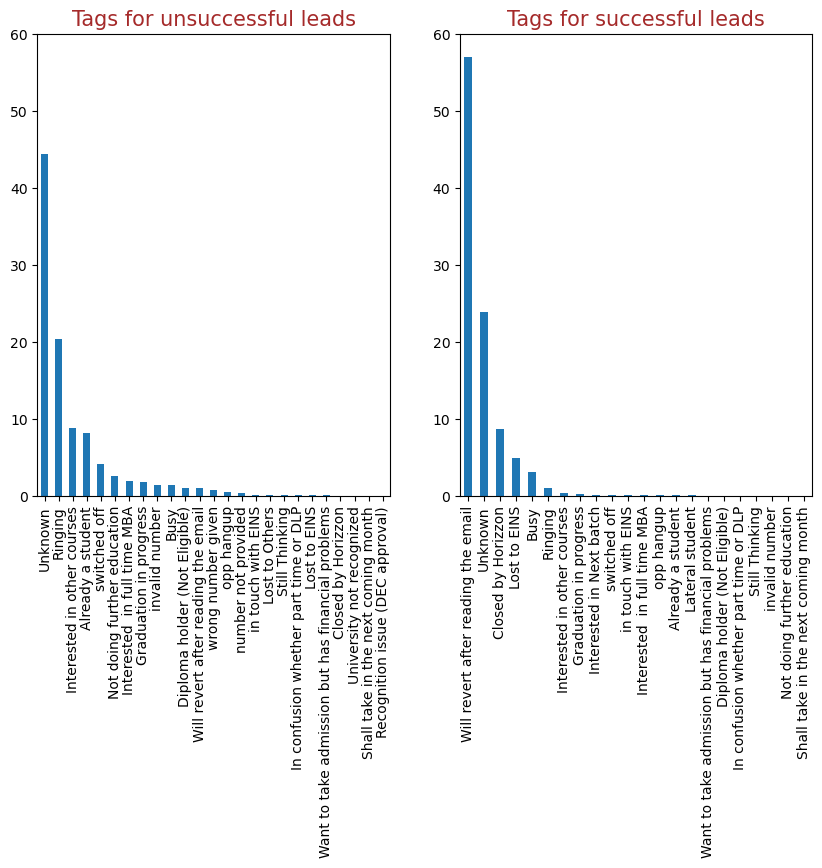

In [35]:
# Calculate the percentages for 'Tags'

unsuccessful = lead['Tags'][lead['Converted'] == 0].value_counts(normalize=True) * 100
successful = lead['Tags'][lead['Converted'] == 1].value_counts(normalize=True) * 100

plt.subplots(figsize=[10,6])

# Create the bar plot
plt.subplot(1,2,1)
ax = unsuccessful.plot.bar()
ax.set_title('Tags for unsuccessful leads', fontsize=15, color='brown')
ax.set_ylim(0, 60)  # Set the range of the y-axis

# Create the bar plot
plt.subplot(1,2,2)
ax = successful.plot.bar()
ax.set_title('Tags for successful leads', fontsize=15, color='brown')
ax.set_ylim(0, 60)  # Set the range of the y-axis

# Display the plot
plt.show()

In [36]:
lead.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  timeOnWebsite  viewsPerVisit  \
0          0          0.0              0            0.0   
1          0          5.0            674            2.5   
2          1          2.0           1532            2.0   
3          0          1.0            305            1.0   
4          1          2.0           1428            1.0   

             Last Activity  Country           Specialization  occupation  \
0  Page Visited on Website  Unknown                  Unknown  Unemployed   
1             Email Opened    India                  Unknown  Unemployed   
2             Email Opened    India  Business Administration     Student   
3              Unreachable    India    Media and Advertising  Unemployed   
4        Converted to Lead    India                  Unknown  Unemployed   

                 mainmotto Search Newspaper Article X Education Forums  \
0  Better Career Prospects     No                No                 No   
1  Better Career Prospects     No                No                 No   
2  Better Career Prospects     No                No                 No   
3  Better Career Prospects     No                No                 No   
4  Better Career Prospects     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

                                  Tags     City freeBook studentActivity  
0          Interested in other courses  Unknown       No        Modified  
1                              Ringing  Unknown       No    Email Opened  
2  Will revert after reading the email   Mumbai      Yes    Email Opened  
3                              Ringing   Mumbai       No        Modified  
4  Will revert after reading the email   Mumbai       No        Modified

In [37]:
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','freeBook']


In [38]:
for col in varlist:

    lead[col] = lead[col].replace({'Yes': 1, "No": 0})
    
    

In [39]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  timeOnWebsite  viewsPerVisit  \
0          0          0.0              0            0.0   
1          0          5.0            674            2.5   
2          1          2.0           1532            2.0   
3          0          1.0            305            1.0   
4          1          2.0           1428            1.0   

             Last Activity  Country           Specialization  occupation  \
0  Page Visited on Website  Unknown                  Unknown  Unemployed   
1             Email Opened    India                  Unknown  Unemployed   
2             Email Opened    India  Business Administration     Student   
3              Unreachable    India    Media and Advertising  Unemployed   
4        Converted to Lead    India                  Unknown  Unemployed   

                 mainmotto  Search  Newspaper Article  X Education Forums  \
0  Better Career Prospects       0                  0                   0   
1  Better Career Prospects       0                  0                   0   
2  Better Career Prospects       0                  0                   0   
3  Better Career Prospects       0                  0                   0   
4  Better Career Prospects       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

                                  Tags     City  freeBook studentActivity  
0          Interested in other courses  Unknown         0        Modified  
1                              Ringing  Unknown         0    Email Opened  
2  Will revert after reading the email   Mumbai         1    Email Opened  
3                              Ringing   Mumbai         0        Modified  
4  Will revert after reading the email   Mumbai         0        Modified

#### For countries only two prominent entries are present: India and Unknown. We can combine all other countries to create new column "Others"




In [40]:
lead["Country_New"] = np.where(lead["Country"].isin(["India","Unknown"]), lead["Country"], "Others")

In [41]:
lead["Country_New"].value_counts()

India      6491
Unknown    2296
Others      287
Name: Country_New, dtype: int64

In [42]:
lead.drop("Country", axis=1, inplace=True)

lead.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  timeOnWebsite  viewsPerVisit  \
0          0          0.0              0            0.0   
1          0          5.0            674            2.5   
2          1          2.0           1532            2.0   
3          0          1.0            305            1.0   
4          1          2.0           1428            1.0   

             Last Activity           Specialization  occupation  \
0  Page Visited on Website                  Unknown  Unemployed   
1             Email Opened                  Unknown  Unemployed   
2             Email Opened  Business Administration     Student   
3              Unreachable    Media and Advertising  Unemployed   
4        Converted to Lead                  Unknown  Unemployed   

                 mainmotto  Search  Newspaper Article  X Education Forums  \
0  Better Career Prospects       0                  0                   0   
1  Better Career Prospects       0                  0                   0   
2  Better Career Prospects       0                  0                   0   
3  Better Career Prospects       0                  0                   0   
4  Better Career Prospects       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

                                  Tags     City  freeBook studentActivity  \
0          Interested in other courses  Unknown         0        Modified   
1                              Ringing  Unknown         0    Email Opened   
2  Will revert after reading the email   Mumbai         1    Email Opened   
3                              Ringing   Mumbai         0        Modified   
4  Will revert after reading the email   Mumbai         0        Modified   

  Country_New  
0     Unknown  
1       India  
2       India  
3       India  
4       India

### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [43]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity', 'Specialization', 'occupation','mainmotto','Tags','City','studentActivity','Country_New']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [44]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  timeOnWebsite  viewsPerVisit  \
0          0          0.0              0            0.0   
1          0          5.0            674            2.5   
2          1          2.0           1532            2.0   
3          0          1.0            305            1.0   
4          1          2.0           1428            1.0   

             Last Activity           Specialization  occupation  \
0  Page Visited on Website                  Unknown  Unemployed   
1             Email Opened                  Unknown  Unemployed   
2             Email Opened  Business Administration     Student   
3              Unreachable    Media and Advertising  Unemployed   
4        Converted to Lead                  Unknown  Unemployed   

                 mainmotto  Search  Newspaper Article  X Education Forums  \
0  Better Career Prospects       0                  0                   0   
1  Better Career Prospects       0                  0                   0   
2  Better Career Prospects       0                  0                   0   
3  Better Career Prospects       0                  0                   0   
4  Better Career Prospects       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

                                  Tags     City  freeBook studentActivity  \
0          Interested in other courses  Unknown         0        Modified   
1                              Ringing  Unknown         0    Email Opened   
2  Will revert after reading the email   Mumbai         1    Email Opened   
3                              Ringing   Mumbai         0        Modified   
4  Will revert after reading the email   Mumbai         0        Modified   

  Country_New  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0     Unknown                                    0                          0   
1       India                                    0                          0   
2       India                                    1                          0   
3       India                                    1                          0   
4       India                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1               

In [45]:
#Dropping the original columns as dummies are created

In [46]:
lead = lead.drop(['Lead Origin','Lead Source','Last Activity', 'Specialization', 'occupation','mainmotto','Tags','City','studentActivity','Country_New'],1)

lead.head()

Do Not Email  Do Not Call  Converted  TotalVisits  timeOnWebsite  \
0             0            0          0          0.0              0   
1             0            0          0          5.0            674   
2             0            0          1          2.0           1532   
3             0            0          0          1.0            305   
4             0            0          1          2.0           1428   

   viewsPerVisit  Search  Newspaper Article  X Education Forums  Newspaper  \
0            0.0       0                  0                   0          0   
1            2.5       0                  0                   0          0   
2            2.0       0                  0                   0          0   
3            1.0       0                  0                   0          0   
4            1.0       0                  0                   0          0   

   Digital Advertisement  Through Recommendations  freeBook  \
0                      0                        0         0   
1                      0                        0         0   
2                      0                        0         1   
3                      0                        0         0   
4                      0                        0         0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  

In [47]:
lead.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 128 columns):
 #    Column                                                  Non-Null Count  Dtype  
---   ------                                                  --------------  -----  
 0    Do Not Email                                            9074 non-null   int64  
 1    Do Not Call                                             9074 non-null   int64  
 2    Converted                                               9074 non-null   int64  
 3    TotalVisits                                             9074 non-null   float64
 4    timeOnWebsite                                           9074 non-null   int64  
 5    viewsPerVisit                                           9074 non-null   float64
 6    Search                                                  9074 non-null   int64  
 7    Newspaper Article                                       9074 non-null   int64  
 8    X Education Forums        

### Checking for Outliers

In [48]:
# Checking for outliers in the continuous variables
lead_num = lead[['TotalVisits','timeOnWebsite','viewsPerVisit']]

In [49]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  timeOnWebsite  viewsPerVisit
count  9074.000000    9074.000000    9074.000000
mean      3.456028     482.887481       2.370151
std       4.858802     545.256560       2.160871
min       0.000000       0.000000       0.000000
25%       1.000000      11.000000       1.000000
50%       3.000000     246.000000       2.000000
75%       5.000000     922.750000       3.200000
90%       7.000000    1373.000000       5.000000
95%      10.000000    1557.000000       6.000000
99%      17.000000    1839.000000       9.000000
max     251.000000    2272.000000      55.000000

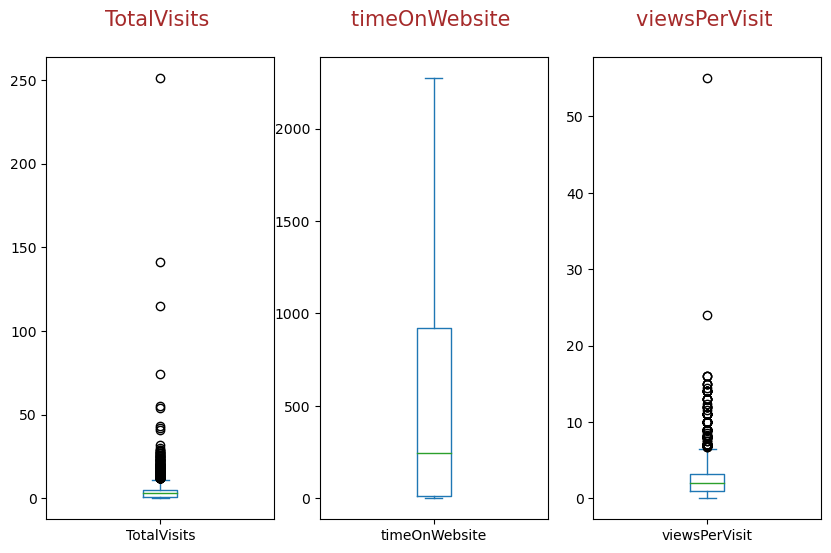

In [50]:
fig, ax = plt.subplots(figsize=[10,6])
plt.subplot(1,3,1)
lead['TotalVisits'].plot.box()
plt.title('TotalVisits \n',fontsize=15,color='brown')

plt.subplot(1,3,2)
lead['timeOnWebsite'].plot.box()
plt.title('timeOnWebsite \n',fontsize=15,color='brown')

plt.subplot(1,3,3)
lead['viewsPerVisit'].plot.box()
plt.title('viewsPerVisit \n',fontsize=15,color='brown')



plt.show()

In [51]:
#TotalVisits has unacceptable outliers 

Q1 = np.quantile(lead['TotalVisits'], 0.25)
Q3 = np.quantile(lead['TotalVisits'], 0.75)
    
IQR = Q3 - Q1
    
upperBound = Q3 + 1.5 * IQR
    
upperBound

11.0

In [52]:
len(lead['TotalVisits'][lead['TotalVisits'] <40])/len(lead['TotalVisits'])

0.9990081551686136

In [53]:
lead = lead[lead['TotalVisits'] <40]

In [54]:
len(lead['viewsPerVisit'][lead['viewsPerVisit'] <15])/len(lead['viewsPerVisit'])

0.9991174848317705

In [55]:
lead = lead[lead['viewsPerVisit'] <15]

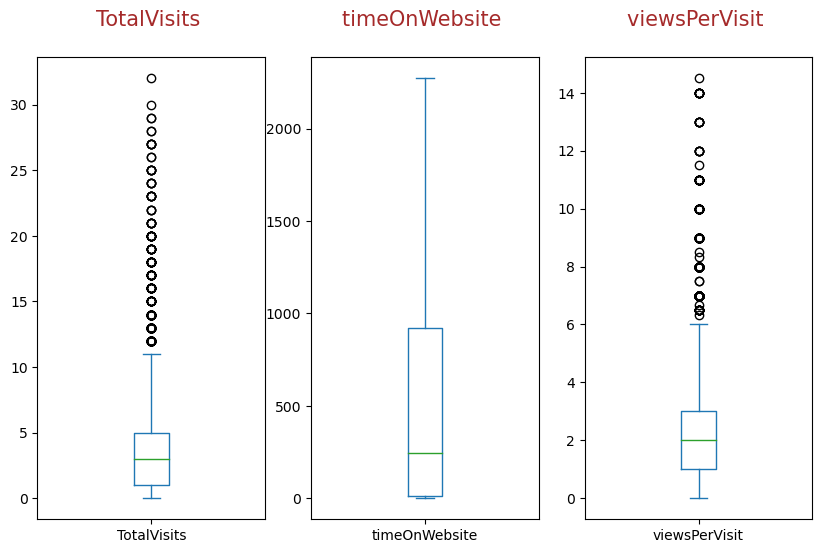

In [56]:
fig, ax = plt.subplots(figsize=[10,6])
plt.subplot(1,3,1)
lead['TotalVisits'].plot.box()
plt.title('TotalVisits \n',fontsize=15,color='brown')

plt.subplot(1,3,2)
lead['timeOnWebsite'].plot.box()
plt.title('timeOnWebsite \n',fontsize=15,color='brown')

plt.subplot(1,3,3)
lead['viewsPerVisit'].plot.box()
plt.title('viewsPerVisit \n',fontsize=15,color='brown')



plt.show()

In [57]:
lead.shape

(9057, 128)

In [58]:
#Test-Train Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  timeOnWebsite  viewsPerVisit  \
0             0            0          0.0              0            0.0   
1             0            0          5.0            674            2.5   
2             0            0          2.0           1532            2.0   
3             0            0          1.0            305            1.0   
4             0            0          2.0           1428            1.0   

   Search  Newspaper Article  X Education Forums  Newspaper  \
0       0                  0                   0          0   
1       0                  0                   0          0   
2       0                  0                   0          0   
3       0                  0                   0          0   
4       0                  0                   0          0   

   Digital Advertisement  Through Recommendations  freeBook  \
0                      0                        0         0   
1                      0                        0         0   
2                      0                        0         1   
3                      0                        0         0   
4                      0                        0         0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0               

In [61]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
#Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','timeOnWebsite','viewsPerVisit']] = scaler.fit_transform(X_train[['TotalVisits','timeOnWebsite','viewsPerVisit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  timeOnWebsite  viewsPerVisit  \
2254             0            0    -0.102937      -0.676805       0.330051   
3631             0            0     0.488915       1.231248       1.319385   
2202             0            0     0.192989      -0.396589       0.824718   
7810             0            0    -0.990715      -0.886967      -1.153950   
1614             0            0    -0.694789       1.041364      -0.659283   

      Search  Newspaper Article  X Education Forums  Newspaper  \
2254       0                  0                   0          0   
3631       0                  0                   0          0   
2202       0                  0                   0          0   
7810       0                  0                   0          0   
1614       0                  0                   0          0   

      Digital Advertisement  Through Recommendations  freeBook  \
2254                      0                        0         0   
3631                      0                        0         1   
2202                      0                        0         0   
7810                      0                        0         0   
1614                      0                        0         0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2254                                    0                          0   
3631                                    1                          0   
2202                                    1                          0   
7810                                    0                          0   
1614                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
2254                        0                           0   
3631                        0                           1   
2202                        0                           0   
7810                        0                           0   
1614                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
2254                     0                   1                      0   
3631                     0                   0                      0   
2202                     0                   1                      0   
7810                     0                   0                      0   
1614                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
2254                   0                       0                           0   
3631                   0                       0                           0   
2202                   0                       0                           0   
7810                   0                       1                           0   
1614                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
2254                              0                          0   
3631                              0                          0   
2202                              0                          0   
7810                              0                          0   
1614                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
2254                      0                           0   
3631                      0                           0   
2202                      0                           0   
7810                      0                           0   
1614                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
2254                         0                    0   
3631                         0                    0   
2202                         0                    0   
7810                         0                    0

In [66]:
### Checking the lead conversion
lead_conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
lead_conversion

37.89334216628023

In [67]:
#We have almost 38% lead conversion

## Looking at Correlations

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True,cmap='RdYlGn')
plt.show()

In [69]:
X_train.shape

(6339, 127)

In [70]:
print("*"*100)
print("                                      High Correlation (> +- 0.6)")
print("*"*100)
for col1 in X_train.columns:
    
    for col2 in X_train.columns:
        
        if col1 != col2:
            if (lead[col1].corr(lead[col2]).round(2) > 0.6) or (lead[col1].corr(lead[col2]).round(2) < -0.6):
                print(f'''
                 {col1} - & - {col2} --> { lead[col1].corr(lead[col2]).round(2)}
                ''')

****************************************************************************************************
                                      High Correlation (> +- 0.6)
****************************************************************************************************

                 Do Not Email - & - Last Activity_Email Bounced --> 0.62
                

                 TotalVisits - & - viewsPerVisit --> 0.67
                

                 viewsPerVisit - & - TotalVisits --> 0.67
                

                 viewsPerVisit - & - Country_New_Unknown --> -0.63
                

                 Newspaper Article - & - X Education Forums --> 0.71
                

                 X Education Forums - & - Newspaper Article --> 0.71
                

                 Lead Origin_Landing Page Submission - & - Specialization_Unknown --> -0.76
                

                 Lead Origin_Landing Page Submission - & - City_Unknown --> -0.82
                

                 Le

In [71]:
highcorr = ['viewsPerVisit', 'Last Activity_Email Bounced','X Education Forums', 'Lead Origin_Landing Page Submission',
            'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import','Lead Source_Olark Chat',
            'studentActivity_Email Link Clicked', 'studentActivity_Email Marked Spam', 'studentActivity_Email Opened',
            'studentActivity_Had a Phone Conversation', 'studentActivity_Page Visited on Website',
            'studentActivity_Resubscribed to emails', 'studentActivity_SMS Sent', 'studentActivity_Unsubscribed',
            'City_Unknown','occupation_Unknown','Tags_Unknown', 'mainmotto_Unknown']

In [72]:
X_train = X_train.drop(highcorr,axis=1)

In [73]:
X_train.shape

(6339, 108)

# 3.  Model Building
Let's start by splitting our data into a training set and a test set.

In [74]:
import statsmodels.api as sm

In [75]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                          102
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Jun 2023   Deviance:                       45223.
Time:                        23:10:16   Pearson chi2:                 2.21e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -3.188e+14   1.04e+07  -3.08e+07      0.000   -3.19e+14   -3.19e+14
Do Not Email                                           -2.514e+14   4.48e+06  -5.61e+07      0.000   -2.51e+14   -2.51e+14
Do Not Call                                            -4.118e+14   4.77e+07  -8.63e+06      0.000   -4.12e+14   -4.12e+14
TotalVisits                                             8.126e+13   1.12e+06   7.28e+07      0.000    8.13e+13    8.13e+13
timeOnWebsite                                           2.188e+14   1.04e+06    2.1e+08      0.000    2.19e+14    2.19e+14
Search                                                  4.678e+14   2.14e+07   2.19e+07      0.000    4.68e+14    4.68e+14
Newspaper Article                                       6.268e+14   5.39e+07   1.16e+07      0.000    6.27e+14    6.27e+14
Newspaper                                                 48.1393   3.06e-07   1.57e+08      0.000      48.139      48.139
Digital Advertisement                                  -3.161e+14   4.35e+07  -7.27e+06      0.000   -3.16e+14   -3.16e+14
Through Recommendations                                -8.032e+14   2.97e+07  -2.71e+07      0.000   -8.03e+14   -8.03e+14
freeBook                                               -7.263e+13   2.73e+06  -2.66e+07      0.000   -7.26e+13   -7.26e+13
Lead Source_Direct Traffic                             -2.093e+14    6.3e+06  -3.32e+07      0.000   -2.09e+14   -2.09e+14
Lead Source_Facebook                                   -1.932e+14   1.47e+07  -1.32e+07      0.000   -1.93e+14   -1.93e+14
Lead Source_Google                                     -1.219e+14   6.24e+06  -1.95e+07      0.000   -1.22e+14   -1.22e+14
Lead Source_Live Chat                                   5.099e+15   6.72e+07   7.59e+07      0.000     5.1e+15     5.1e+15
Lead Source_NC_EDM                                      2.841e+16   6.75e+07   4.21e+08      0.000    2.84e+16    2.84e+16
Lead Source_Organic Search                             -1.337e+14   6.57e+06  -2.04e+07      0.000   -1.34e+14   -1.34e+14
Lead Source_Pay per Click Ads                          -1.066e+15   6.76e+07  -1.58e+07      0.000   -1.07e+15   -1.07e+15
Lead Source_Press_Release                              -1.356e+15   6.78e+07     -2e+07      0.000   -1.36e+15   -1.36e+15
Lead Source_Reference                                  -8.311e+13   5.06e+06  -1.64e+07      0.000   -8.31e+13   -8.31e+13
Lead Source_Referral Sites                               2.39e+13   9.47e+06   2.52e+06      0.000    2.39e+13    2.39e+13
Lead Source_Social Media                               -1.457e+15   6.78e+07  -2.15e+07      0.000   -1.46e+15   -1.46e+15
Lead Sou

### Feature Selection Using RFE

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [77]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 69),
 ('TotalVisits', False, 40),
 ('timeOnWebsite', False, 3),
 ('Search', False, 49),
 ('Newspaper Article', False, 66),
 ('Newspaper', False, 85),
 ('Digital Advertisement', False, 50),
 ('Through Recommendations', False, 72),
 ('freeBook', False, 42),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 83),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 81),
 ('Lead Source_Press_Release', False, 74),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 77),
 ('Lead Source_Social Media', False, 84),
 ('Lead Source_WeLearn', False, 80),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 41),
 ('Lead Source_blog', False, 87),
 ('Lead Source_google', False, 53),
 ('Lead Source_testone', False, 88),
 ('Lead Source_wel

In [80]:
col = X_train.columns[rfe.support_]

In [81]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'timeOnWebsite', 'Search',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'freeBook', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
   

### Assessing the model with StatsModels

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.8
Date:                Mon, 19 Jun 2023   Deviance:                       2673.6
Time:                        23:10:26   Pearson chi2:                 1.59e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5945
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1675      0.097    -22.290      0.000      -2.358      -1.977
Lead Source_Welingak Website                 3.9688      1.026      3.869      0.000       1.958       5.979
Last Activity_SMS Sent                       2.3161      0.116     20.008      0.000       2.089       2.543
occupation_Unemployed                        1.6170      0.114     14.193      0.000       1.394       1.840
occupation_Working Professional              1.7529      0.341      5.139      0.000       1.084       2.421
Tags_Closed by Horizzon                      7.0441      1.013      6.953      0.000       5.059       9.030
Tags_Diploma holder (Not Eligible)         -23.6586   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_Graduation in progress                 -1.7904      0.546     -3.278      0.001      -2.861      -0.720
Tags_Interested  in full time MBA           -2.5788      0.728     -3.543      0.000      -4.006      -1.152
Tags_Interested in other courses            -2.3773      0.346     -6.870      0.000      -3.056      -1.699
Tags_Lost to EINS                            6.5414      0.730      8.956      0.000       5.110       7.973
Tags_Not doing further education            -3.6278      1.028     -3.530      0.000      -5.642      -1.613
Tags_Ringing                                -4.2629      0.243    -17.544      0.000      -4.739      -3.787
Tags_Will revert after reading the email     3.9908      0.188     21.275      0.000       3.623       4.358
Tags_invalid number                         -4.9471      1.025     -4.828      0.000      -6.956      -2.939
Tags_number not provided                   -25.1516   2.81e+04     -0.001      0.999   -5.51e+04     5.5e+04
Tags_opp hangup                             -3.9149      1.054     -3.715      0.000      -5.980      -1.850
Tags_switched off                           -4.7013      0.525     -8.957      0.000      -5.730      -3.673
Tags_wrong number given                    -25.3033   2.05e+04     -0.001      0.999   -4.02e+04    4.02e+04
studentActivity_Modified                    -1.6522      0.121    -13.622      0.000      -1.890      -1.414
studentActivity_Olark Chat Conversation     -0.9384      0.396     -2.369      0.018      -1.715      -0.162
============================================================================================================
"""

In [83]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                    Tags_Closed by Horizzon  1.25
16                         Tags_switched off  1.18
10          Tags_Not doing further education  1.10
9                          Tags_Lost to EINS  1.08
7          Tags_Interested  in full time MBA  1.08
6                Tags_Graduation in progress  1.07
0               Lead Source_Welingak Website  1.07
13                       Tags_invalid number  1.06
5         Tags_Diploma holder (Not Eligible)  1.03
17                   Tags_wrong number given  1.03
14                  Tags_number not provided  1.02
15                           Tags_opp hangup  1.02
19   studentActivity_Olark Chat Conversation  1.01
3            occupation_Working Professional  0.82
8           Tags_Interested in other courses  0.42
12  Tags_Will revert after reading the email  0.23
2                      occupation_Unemployed  0.22
1                     Last Activity_SMS Sent  0.08
11                              Tags_Ringing  0.07
18                  studentActivity_Modified  0.01

### The column 'Tags_Diploma holder (Not Eligible)' has high p-value hence statistically insignificant, it can be deleted

In [85]:
col = col.drop('Tags_Diploma holder (Not Eligible)')

### Rebuilding the model

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1347.4
Date:                Mon, 19 Jun 2023   Deviance:                       2694.7
Time:                        23:10:27   Pearson chi2:                 1.63e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5931
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1760      0.097    -22.355      0.000      -2.367      -1.985
Lead Source_Welingak Website                 4.0236      1.026      3.922      0.000       2.013       6.034
Last Activity_SMS Sent                       2.3320      0.115     20.223      0.000       2.106       2.558
occupation_Unemployed                        1.5681      0.113     13.816      0.000       1.346       1.791
occupation_Working Professional              1.5827      0.323      4.899      0.000       0.950       2.216
Tags_Closed by Horizzon                      7.1251      1.013      7.034      0.000       5.140       9.110
Tags_Graduation in progress                 -1.7355      0.546     -3.176      0.001      -2.806      -0.665
Tags_Interested  in full time MBA           -2.5166      0.728     -3.458      0.001      -3.943      -1.090
Tags_Interested in other courses            -2.3189      0.346     -6.700      0.000      -2.997      -1.641
Tags_Lost to EINS                            6.5747      0.730      9.006      0.000       5.144       8.006
Tags_Not doing further education            -3.5725      1.028     -3.475      0.001      -5.588      -1.558
Tags_Ringing                                -4.2183      0.243    -17.388      0.000      -4.694      -3.743
Tags_Will revert after reading the email     4.0663      0.188     21.668      0.000       3.698       4.434
Tags_invalid number                         -4.9037      1.025     -4.786      0.000      -6.912      -2.895
Tags_number not provided                   -25.1057    2.8e+04     -0.001      0.999    -5.5e+04    5.49e+04
Tags_opp hangup                             -3.8708      1.054     -3.673      0.000      -5.936      -1.805
Tags_switched off                           -4.6580      0.525     -8.877      0.000      -5.686      -3.630
Tags_wrong number given                    -25.2579   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
studentActivity_Modified                    -1.6588      0.121    -13.702      0.000      -1.896      -1.422
studentActivity_Olark Chat Conversation     -0.9389      0.396     -2.371      0.018      -1.715      -0.163
============================================================================================================
"""

### The column 'Tags_number not provided' has high p-value hence statistically insignificant, it can be deleted

In [87]:
col = col.drop('Tags_number not provided')

### Rebuilding the model

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.5
Date:                Mon, 19 Jun 2023   Deviance:                       2723.1
Time:                        23:10:27   Pearson chi2:                 1.55e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5913
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1648      0.097    -22.364      0.000      -2.354      -1.975
Lead Source_Welingak Website                 4.0732      1.025      3.973      0.000       2.064       6.083
Last Activity_SMS Sent                       2.2907      0.114     20.114      0.000       2.068       2.514
occupation_Unemployed                        1.5113      0.113     13.431      0.000       1.291       1.732
occupation_Working Professional              1.5484      0.323      4.794      0.000       0.915       2.182
Tags_Closed by Horizzon                      7.1404      1.013      7.051      0.000       5.156       9.125
Tags_Graduation in progress                 -1.6883      0.545     -3.096      0.002      -2.757      -0.620
Tags_Interested  in full time MBA           -2.4734      0.727     -3.400      0.001      -3.899      -1.048
Tags_Interested in other courses            -2.2717      0.345     -6.580      0.000      -2.948      -1.595
Tags_Lost to EINS                            6.5635      0.729      8.999      0.000       5.134       7.993
Tags_Not doing further education            -3.5191      1.027     -3.427      0.001      -5.532      -1.506
Tags_Ringing                                -4.1385      0.241    -17.147      0.000      -4.612      -3.665
Tags_Will revert after reading the email     4.0911      0.187     21.871      0.000       3.725       4.458
Tags_invalid number                         -4.8221      1.024     -4.708      0.000      -6.830      -2.815
Tags_opp hangup                             -3.7910      1.053     -3.600      0.000      -5.855      -1.727
Tags_switched off                           -4.5757      0.524     -8.732      0.000      -5.603      -3.549
Tags_wrong number given                    -24.1787   1.24e+04     -0.002      0.998   -2.44e+04    2.44e+04
studentActivity_Modified                    -1.6363      0.120    -13.580      0.000      -1.872      -1.400
studentActivity_Olark Chat Conversation     -0.9228      0.396     -2.332      0.020      -1.698      -0.147
============================================================================================================
"""

### The column 'Tags_wrong number given' has high p-value hence statistically insignificant, it can be deleted


In [89]:
col = col.drop('Tags_wrong number given')

### Rebuilding the model

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6339
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1390.6
Date:                Mon, 19 Jun 2023   Deviance:                       2781.1
Time:                        23:10:27   Pearson chi2:                 1.42e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5876
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1364      0.096    -22.361      0.000      -2.324      -1.949
Lead Source_Welingak Website                 4.1731      1.024      4.075      0.000       2.166       6.180
Last Activity_SMS Sent                       2.1993      0.111     19.816      0.000       1.982       2.417
occupation_Unemployed                        1.3959      0.111     12.628      0.000       1.179       1.613
occupation_Working Professional              1.4784      0.323      4.577      0.000       0.845       2.111
Tags_Closed by Horizzon                      7.1755      1.012      7.088      0.000       5.191       9.160
Tags_Graduation in progress                 -1.5921      0.543     -2.932      0.003      -2.657      -0.528
Tags_Interested  in full time MBA           -2.3868      0.727     -3.283      0.001      -3.812      -0.962
Tags_Interested in other courses            -2.1763      0.344     -6.334      0.000      -2.850      -1.503
Tags_Lost to EINS                            6.5462      0.728      8.989      0.000       5.119       7.974
Tags_Not doing further education            -3.4123      1.025     -3.330      0.001      -5.421      -1.404
Tags_Ringing                                -3.9760      0.239    -16.649      0.000      -4.444      -3.508
Tags_Will revert after reading the email     4.1429      0.186     22.276      0.000       3.778       4.507
Tags_invalid number                         -4.6556      1.023     -4.550      0.000      -6.661      -2.650
Tags_opp hangup                             -3.6288      1.051     -3.452      0.001      -5.689      -1.568
Tags_switched off                           -4.4077      0.523     -8.433      0.000      -5.432      -3.383
studentActivity_Modified                    -1.6000      0.119    -13.391      0.000      -1.834      -1.366
studentActivity_Olark Chat Conversation     -0.8972      0.395     -2.272      0.023      -1.671      -0.123
============================================================================================================
"""

### The p-values are below 0.05, Let's check VIF again

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                    Tags_Closed by Horizzon  1.24
14                         Tags_switched off  1.17
9           Tags_Not doing further education  1.09
8                          Tags_Lost to EINS  1.08
6          Tags_Interested  in full time MBA  1.07
0               Lead Source_Welingak Website  1.07
5                Tags_Graduation in progress  1.07
12                       Tags_invalid number  1.06
13                           Tags_opp hangup  1.02
16   studentActivity_Olark Chat Conversation  1.01
3            occupation_Working Professional  0.80
7           Tags_Interested in other courses  0.41
11  Tags_Will revert after reading the email  0.22
2                      occupation_Unemployed  0.21
1                     Last Activity_SMS Sent  0.08
10                              Tags_Ringing  0.07
15                  studentActivity_Modified  0.01

### VIF is in acceptable range 

### We can call this our final model

# 4. Prediction on Train Data
---

In [92]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [93]:
y_train_pred[:10]

array([0.01080554, 0.99632186, 0.1056104 , 0.02328488, 0.96870666,
       0.1056104 , 0.02328488, 0.51571993, 0.1056104 , 0.08782207])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})

y_train_pred_final['CustID'] = y_train.index

y_train_pred_final.head()

Converted  Convert_Prob  CustID
0          0      0.010806    2254
1          1      0.996322    3631
2          0      0.105610    2202
3          0      0.023285    7810
4          1      0.968707    1614

In [95]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted
0          0      0.010806    2254          0
1          1      0.996322    3631          1
2          0      0.105610    2202          0
3          0      0.023285    7810          0
4          1      0.968707    1614          1

In [96]:
from sklearn import metrics

In [97]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9217542199085029


 ### Let's take a look at the confusion matrix 

In [98]:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3785,  169],
       [ 327, 2058]], dtype=int64)

In [99]:
# Predicted     not conveted    converted
# Actual
# not conveted        3785      169
# converted            327       2058 

In [100]:
## Metrics beyond simply accuracy

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8628930817610063

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.9572584724329792

In [104]:
# Calculate false postive rate - predicting Conversion when customer does not have converted
print(FP/ float(TN+FP))

0.04274152756702074


In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.9241131567130669


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.920476653696498


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )


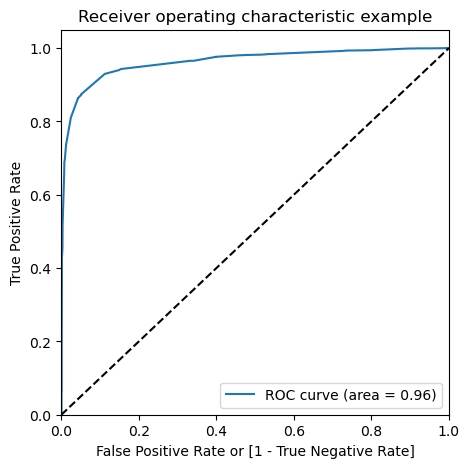

In [109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

# Finding Optimal Cutoff Point

### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0      0.010806    2254          0    1    0    0    0    0    0   
1          1      0.996322    3631          1    1    1    1    1    1    1   
2          0      0.105610    2202          0    1    1    0    0    0    0   
3          0      0.023285    7810          0    1    0    0    0    0    0   
4          1      0.968707    1614          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    1  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    1

In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376242  1.000000  0.000000
0.1   0.1  0.780723  0.965199  0.669449
0.2   0.2  0.903613  0.929560  0.887962
0.3   0.3  0.903613  0.929560  0.887962
0.4   0.4  0.920650  0.870440  0.950936
0.5   0.5  0.921754  0.862893  0.957258
0.6   0.6  0.913393  0.810063  0.975721
0.7   0.7  0.912605  0.807128  0.976227
0.8   0.8  0.912447  0.806709  0.976227
0.9   0.9  0.873166  0.675472  0.992413


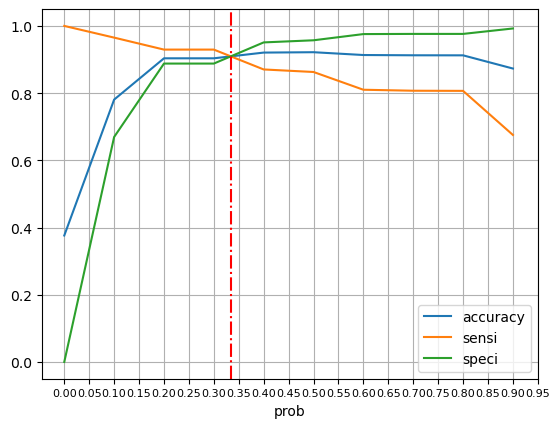

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
ax = plt.gca()
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='-.') # additing axline
ax.grid(True)
plt.show()

#### From the curve above, 0.335 is the optimum point to take it as a cutoff probability.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.335 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0      0.010806    2254          0    1    0    0    0    0    0   
1          1      0.996322    3631          1    1    1    1    1    1    1   
2          0      0.105610    2202          0    1    1    0    0    0    0   
3          0      0.023285    7810          0    1    0    0    0    0    0   
4          1      0.968707    1614          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    1    1    1    1                1  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    1    1    1    1                1

In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9198611768417732

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3753,  201],
       [ 307, 2078]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8712788259958071

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.9491654021244309

In [119]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.05083459787556904


In [120]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9118034225537517


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.924384236453202


## Precision and Recall

##### Looking at the confusion matrix again

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3785,  169],
       [ 327, 2058]], dtype=int64)

In [123]:
# Precision: TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9241131567130669

In [124]:
# Recall: TP / TP + FN


confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8628930817610063

In [125]:
#Using sklearn utilities for the same

In [126]:
from sklearn.metrics import precision_score, recall_score

In [127]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9241131567130669

In [128]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8628930817610063

### Precision and recall tradeoff

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6334    0
 6335    1
 6336    0
 6337    0
 6338    0
 Name: Converted, Length: 6339, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6334    0
 6335    1
 6336    0
 6337    0
 6338    0
 Name: predicted, Length: 6339, dtype: int64)

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

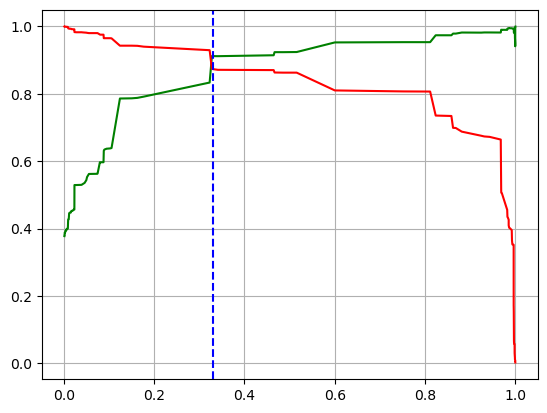

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
ax = plt.gca()
plt.axvline(x=0.33, color='b', linestyle='--') # additing axline
ax.grid(True)
plt.show()

# 5. Making predictions on the test set

In [133]:
X_test[['TotalVisits','timeOnWebsite','viewsPerVisit']] = scaler.fit_transform(X_test[['TotalVisits','timeOnWebsite','viewsPerVisit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  timeOnWebsite  viewsPerVisit  \
2467             0            0    -0.970257      -0.880621      -1.143439   
5525             0            0     4.481977       1.616154       1.887739   
6872             0            0    -0.396338      -0.122704      -0.185721   
7825             0            0    -0.109378       1.619781       0.293138   
4588             0            0    -0.970257      -0.880621      -1.143439   

      Search  Newspaper Article  X Education Forums  Newspaper  \
2467       0                  0                   0          0   
5525       0                  0                   0          0   
6872       0                  0                   0          0   
7825       0                  0                   0          0   
4588       0                  0                   0          0   

      Digital Advertisement  Through Recommendations  freeBook  \
2467                      0                        0         0   
5525                      0                        0         0   
6872                      0                        0         1   
7825                      0                        0         1   
4588                      0                        0         0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2467                                    0                          0   
5525                                    0                          0   
6872                                    1                          0   
7825                                    1                          0   
4588                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
2467                        0                           0   
5525                        0                           0   
6872                        0                           1   
7825                        0                           1   
4588                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
2467                     0                   0                      0   
5525                     0                   0                      0   
6872                     0                   0                      0   
7825                     0                   0                      0   
4588                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
2467                   0                       1                           0   
5525                   0                       0                           1   
6872                   0                       0                           0   
7825                   0                       0                           0   
4588                   0                       1                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
2467                              0                          0   
5525                              0                          0   
6872                              0                          0   
7825                              0                          0   
4588                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
2467                      0                           0   
5525                      0                           0   
6872                      0                           0   
7825                      0                           0   
4588                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
2467                         0                    0   
5525                         0                    0   
6872                         0                    0   
7825                         0                    0

In [134]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
2467                             0                       1   
5525                             0                       0   
6872                             0                       1   
7825                             0                       0   
4588                             0                       0   

      occupation_Unemployed  occupation_Working Professional  \
2467                      1                                0   
5525                      0                                1   
6872                      1                                0   
7825                      1                                0   
4588                      0                                0   

      Tags_Closed by Horizzon  Tags_Graduation in progress  \
2467                        0                            0   
5525                        0                            0   
6872                        0                            0   
7825                        0                            0   
4588                        0                            0   

      Tags_Interested  in full time MBA  Tags_Interested in other courses  \
2467                                  0                                 0   
5525                                  0                                 0   
6872                                  0                                 0   
7825                                  0                                 0   
4588                                  0                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
2467                  0                                 0             0   
5525                  0                                 0             0   
6872                  0                                 0             0   
7825                  0                                 0             1   
4588                  0                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
2467                                         0                    0   
5525                                         1                    0   
6872                                         1                    0   
7825                                         0                    0   
4588                                         0                    0   

      Tags_opp hangup  Tags_switched off  studentActivity_Modified  \
2467                0                  0                         1   
5525                0                  0                         0   
6872                0                  0                         0   
7825                0                  0                         0   
4588                0                  0                         0   

      studentActivity_Olark Chat Conversation  
2467                                        0  
5525                                        0  
6872                                        0  
7825                                        0  
4588                                        0

In [135]:
X_test_sm = sm.add_constant(X_test)

In [136]:
y_test_pred = res.predict(X_test_sm)

In [137]:
y_test_pred[:10]

2467    0.464749
5525    0.970254
6872    0.996322
7825    0.008867
4588    0.105610
3722    0.996322
6583    0.074661
3020    0.996999
4965    0.322891
8345    0.023285
dtype: float64

In [138]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
# Let's see the head
y_pred_1.head()

0
2467  0.464749
5525  0.970254
6872  0.996322
7825  0.008867
4588  0.105610

In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [141]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
y_pred_final.head()

Converted  CustID         0
0          1    2467  0.464749
1          1    5525  0.970254
2          1    6872  0.996322
3          0    7825  0.008867
4          0    4588  0.105610

In [145]:
# Renaming the column 

y_pred_final = y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [146]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis=1)

In [147]:
y_pred_final.head()

CustID  Converted  Convert_Prob
0    2467          1      0.464749
1    5525          1      0.970254
2    6872          1      0.996322
3    7825          0      0.008867
4    4588          0      0.105610

In [148]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.335 else 0)

In [149]:
y_pred_final.head()

CustID  Converted  Convert_Prob  final_predicted
0    2467          1      0.464749                1
1    5525          1      0.970254                1
2    6872          1      0.996322                1
3    7825          0      0.008867                0
4    4588          0      0.105610                0

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9183222958057395

In [151]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1580,   91],
       [ 131,  916]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.874880611270296

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.9455415918611609

In [155]:
# Precision: TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9241131567130669

In [156]:
# Recall: TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8628930817610063

## Generating Score Column in Original Dataset

In [157]:
X[['TotalVisits','timeOnWebsite','viewsPerVisit']] = scaler.fit_transform(X[['TotalVisits','timeOnWebsite','viewsPerVisit']])

In [158]:
X = X[col]
X.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   occupation_Unemployed  occupation_Working Professional  \
0                      1                                0   
1                      1                                0   
2                      0                                0   
3                      1                                0   
4                      1                                0   

   Tags_Closed by Horizzon  Tags_Graduation in progress  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Tags_Interested  in full time MBA  Tags_Interested in other courses  \
0                                  0                                 1   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
0                  0                                 0             0   
1                  0                                 0             1   
2                  0                                 0             0   
3                  0                                 0             1   
4                  0                                 0             0   

   Tags_Will revert after reading the email  Tags_invalid number  \
0                                         0                    0   
1                                         0                    0   
2                                         1                    0   
3                                         0                    0   
4                                         1                    0   

   Tags_opp hangup  Tags_switched off  studentActivity_Modified  \
0                0                  0                         1   
1                0                  0                         0   
2                0                  0                         0   
3                0                  0                         1   
4                0                  0                         1   

   studentActivity_Olark Chat Conversation  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [159]:
X_sm = sm.add_constant(X)

In [160]:
y_pred = res.predict(X_sm)

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred)

In [162]:
# Converting y_test to dataframe
y_df = pd.DataFrame(y)

In [163]:
# Using copy of initial data for creating score column
lead_original

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

In [164]:
# Putting CustID to index
y_df['Prospect ID'] = lead_original['Prospect ID']

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_1],axis=1)

In [167]:
y_pred_final

Converted                           Prospect ID         0
0             0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  0.010806
1             0  2a272436-5132-4136-86fa-dcc88c88f482  0.008867
2             1  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0.881479
3             0  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0.001803
4             1  3256f628-e534-4826-9d63-4a8b88782852  0.858437
...         ...                                   ...       ...
9052          1  19d6451e-fcd6-407c-b83b-48e1af805ea9  0.967779
9053          0  82a7005b-7196-4d56-95ce-a79f937a158d  0.811344
9054          0  aac550fe-a586-452d-8d3c-f1b62c94e02c  0.039284
9055          1  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  0.515720
9056          1  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  0.982043

[9057 rows x 3 columns]

In [168]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [169]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Convert_Prob'], axis=1)

In [170]:
y_pred_final.head()

Prospect ID  Converted  Convert_Prob
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0      0.010806
1  2a272436-5132-4136-86fa-dcc88c88f482          0      0.008867
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1      0.881479
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0      0.001803
4  3256f628-e534-4826-9d63-4a8b88782852          1      0.858437

In [171]:
# Creating the predicted column
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.335 else 0)

In [172]:
# Creating the predicted column
y_pred_final['Lead Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [173]:
y_pred_final.head()

Prospect ID  Converted  Convert_Prob  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0      0.010806   
1  2a272436-5132-4136-86fa-dcc88c88f482          0      0.008867   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1      0.881479   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0      0.001803   
4  3256f628-e534-4826-9d63-4a8b88782852          1      0.858437   

   final_predicted  Lead Score  
0                0           1  
1                0           1  
2                1          88  
3                0           0  
4                1          86

In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9193993596113503

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[5333,  292],
       [ 438, 2994]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8723776223776224

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.9480888888888889

In [179]:
# Precision: TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9241131567130669

In [180]:
# Recall: TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8628930817610063

# 6. Appending the Lead Score Column to Original dataframe

In [181]:
to_append = y_pred_final[['Prospect ID','Lead Score']]
to_append

Prospect ID  Lead Score
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620           1
1     2a272436-5132-4136-86fa-dcc88c88f482           1
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a          88
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc           0
4     3256f628-e534-4826-9d63-4a8b88782852          86
...                                    ...         ...
9052  19d6451e-fcd6-407c-b83b-48e1af805ea9          97
9053  82a7005b-7196-4d56-95ce-a79f937a158d          81
9054  aac550fe-a586-452d-8d3c-f1b62c94e02c           4
9055  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9          52
9056  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff          98

[9057 rows x 2 columns]

In [182]:
Lead_Score_Output = pd.merge(lead_original, to_append, on='Prospect ID')
Lead_Score_Output

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9052  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9053  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9054  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9055  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9056  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9052  Landing Page Submission  Direct Traffic          Yes          No   
9053  Landing Page Submission  Direct Traffic           No          No   
9054  Landing Page Submission  Direct Traffic          Yes          No   
9055  Landing Page Submission          Google           No          No   
9056  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9052          1          8.0                         1845   
9053          0          2.0                          238   
9054          0          2.0                          199   
9055          1          3.0                          499   
9056          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9052                  2.67        Email Marked Spam  Saudi Arabia   
9053                  2.00                 SMS Sent         India   
9054                  2.00                 SMS Sent         India   
9055                  3.00                 SMS Sent         India   
9056                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9052     IT Projects Management                             Select   
9053      Media and Advertising                             Select   
9054    Business Administration                             Select   
9055  Human Resource Management                      Online Search   
9056    Supply Chain Management                             Select   

     What is your current occu

# <font color = maroon> <p style='text-align: left;'> 7. Recommendation: </p>

### <font color = green> <p style='text-align: left;'> In above dataframe the Prospect ID having a Lead Score more than 35 could be considered as HOT LEADS. </p>

#### Saving the output .CSV file <font color = blue> (Optional: Please remove the comment identifier '#' and run the cell)

In [183]:
# Lead_Score_Output.to_csv('Lead_Score_Output.csv')

## <p style='text-align: center;'> ------------------------------------------------------------------------------------------------------------------------------ </p>

# <p style='text-align: center;'> END </p>

# <p style='text-align: center;'> !!Thank You!! </p>